In [1]:
from pathlib import Path
import itertools

import numpy as np

import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.pyplot as plt


import themepy
paper_path = Path('../../../paper/figures/')

theme = themepy.Theme('paper')

%matplotlib inline

In [2]:
nu = [('storm', '⛈️', 'full', '🌂'),
      ('lightning', '🌩️', 'half', '🌂'),
      ('rain', '🌧️', 'half', '☔'),
      ('clouds', '☁️', 'none', '🌂'),
      ('sun', '⛅', 'none', '⛱️')]
nu_color ={'storm': 'slategrey',
 'lightning': 'indigo',
 'rain': 'darkblue',
 'clouds': 'yellowgreen',
 'sun': 'orange'}

In [56]:
def make_graph(ax, graph, flag=None, color = 'k', fcolor='red', ms=10):
    flag = [] if flag is None else flag
    for (bottom, top) in graph:
        source = bottom[0], bottom[1]
        target = top[0], top[1]
        e = mpatches.FancyArrowPatch(source, target, transform=ax.transData, color=color, mutation_scale=ms)
        ax.add_patch(e)
    for (bottom, top) in flag:
        source = bottom[0], bottom[1]
        target = top[0], top[1]
        e = mpatches.FancyArrowPatch(source, target, transform=ax.transData,mutation_scale=ms, color=fcolor)
        ax.add_patch(e)
        
def hasse_full(ax, nu, graph, flag=None, text_kw=None, ms=7):
    flag = [] if flag is None else flag
    text_kw = {} if text_kw is None else text_kw
    for key in nu:
        x, y = nu[key]
        ax.text(x, y, key, **text_kw)
    make_graph(ax, graph, flag, ms=ms)
    return

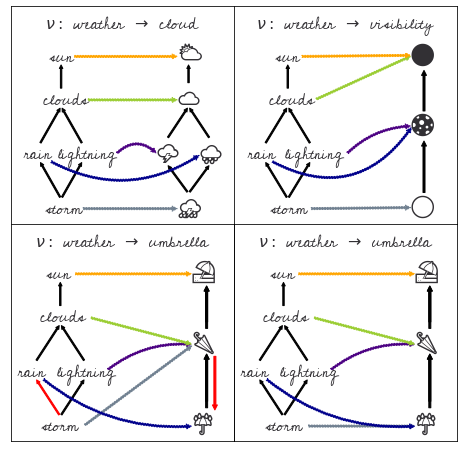

In [127]:
fontsize=16 

fig, axd = plt.subplot_mosaic([['total', 'partial'], 
                               ['invalid', 'fixed']], figsize=(8,8), 
                              gridspec_kw={'wspace':0, 'hspace':0})


r, c, l = np.array([.0, .15, .3]) + .05
b, m1, m2, t = np.array([.1, .35, .6, .8])-.05
pos_words = {'storm': (c-.01, b), 'lightning':(l-.07, m1), 'rain':(r-.01,m1), 
             'clouds':(c-.025,m2), 'sun':(c+.02, t)}

rg, cg, lg = np.array([.0, .15, .3]) + .15
bg, m1g, m2g, tg = np.array([.1, .35, .6, .8])-.05

syp = .065
typ = .01
graph = [[(cg,bg+syp), (lg,m1g-typ)], 
         [(cg,bg+syp), (rg,m1g-typ)], 
         [(lg,m1g+syp),(cg,m2g-typ)], 
         [(rg,m1g+syp), (cg,m2g-typ)], 
         [(cg,m2g+syp), (cg,tg-typ)]]
for name, ax in axd.items():
    if name == "invalid":
         hasse_full(ax, pos_words, [graph[0]] + graph[2:], [graph[1]], text_kw={'fontsize':fontsize})
    else:
        hasse_full(ax, pos_words, graph, text_kw={'fontsize':fontsize})

r, c, l = np.array([.0, .15, .3]) + .95
b, m1, m2, t = np.array([.1, .35, .6, .8])-.05
pos_emoji = {'⛈️': (c, b), '🌩️':(r, m1),  '🌧️':(l,m1),'☁️':(c, m2), '⛅':(c,t)}
rg, cg, lg = np.array([.0, .15, .3]) + 1.035
bg, m1g, m2g, tg = np.array([.1, .35, .6, .8])-.05

text_kwf = {'fontsize':20, 'fontfamily':'Segoe UI Emoji'}
syp = .09
typ = .01
graph_emojis =  [[(cg,bg+syp), (lg,m1g-typ-.015)], 
         [(cg,bg+syp), (rg,m1g-typ-.015)], 
         [(lg,m1g+syp),(cg,m2g-typ)], 
         [(rg,m1g+syp), (cg,m2g-typ)], 
         [(cg,m2g+syp), (cg,tg-typ)]]
hasse_full(axd['total'], pos_emoji, graph_emojis, text_kw=text_kwf)

for (source, target, _, _) in nu:
    connectionstyle=None
    sxo, syo = pos_words[source]
    sx, sy = sxo+.16, syo+.02
    txo, tyo = pos_emoji[target]
    tx, ty = txo+.02, tyo+.02
    if source=='clouds':
        sx = sxo+.3
    elif source == 'rain':
        sx = sxo+.18
        sy = syo - .01
        connectionstyle="arc3,rad=.3"
    elif source == 'lightning':
        sx = sxo+.4
        connectionstyle="arc3,rad=-.5"
    elif source== 'storm':
        sx = sxo+.25

    a =  mpatches.FancyArrowPatch((sx, sy), (tx, ty), transform=axd['total'].transData,
                                      connectionstyle=connectionstyle,
                                        mutation_scale=10, linestyle=':', color=nu_color[source])
    axd['total'].add_patch(a)

# partial 
def add_circle(ax, x,y, ec='k', fc='white', r=.035, hatch=None):
    c = mpatches.Circle((x,y), radius=r, edgecolor=ec, facecolor=fc, hatch=hatch)
    ax.add_patch(c)
    
def add_wedge(ax, x, y, ec='k', fc='black', theta1=270, theta2=90):
    w = mpatches.Wedge((x,y), r=.035, ec=ec, fc=fc, theta1=theta1, theta2=theta2)
    ax.add_patch(w)
    
rg, cg, lg = np.array([.0, .15, .3]) + 1.035
bg, m1g, m2g, tg = np.array([.1, .35, .6, .8])-.025
mmg = m1g + (m2g-m1g)/2

#add_circle(axd['partial'], cg, bg, fc='k')
#add_circle(axd['partial'], cg, tg)
#add_circle(axd['partial'], cg, mmg)
#add_wedge(axd['partial'], cg, mmg)

make_graph(axd['partial'], [[(cg,bg+.06), (cg, mmg-.06)],[(cg, mmg+.06), (cg, tg-.06)]])
pos_vis = {'none':(cg, tg), 'half': (cg, mmg), 'full':(cg, bg)}
for u, sym in zip(pos_vis, ['⚫', '🌑', '⚪']):
    x, y = pos_vis[u]
    axd['partial'].text(x-.1,y-.025, sym, **text_kwf)
for (source,_, target,_) in nu:
    connectionstyle=None
    sxo, syo = pos_words[source]
    sx, sy = sxo+.16, syo+.02
    txo, tyo = pos_vis[target]
    tx, ty = txo-.075, tyo
    if source=='clouds':
        sx = sxo+.3
    elif source == 'rain':
        sx = sxo+.15
        sy = syo - .01
        connectionstyle="arc3,rad=.45"
    elif source == 'lightning':
        sx = sxo+.4
        connectionstyle="arc3,rad=-.2"
    elif source== 'storm':
        sx = sxo+.25

    a =  mpatches.FancyArrowPatch((sx, sy), (tx, ty), transform=axd['partial'].transData,
                                      connectionstyle=connectionstyle,
                                        mutation_scale=10, linestyle=':', color=nu_color[source])
    axd['partial'].add_patch(a)

rg, cg, lg = np.array([.0, .15, .3]) + 1.035
bg, m1g, m2g, tg = np.array([.1, .35, .6, .8])
mmg = m1g + (m2g-m1g)/2

for name in ['invalid', 'fixed']:
    make_graph(axd[name], [[(cg, mmg+.065), (cg, tg-.077)], [(cg,bg+.075), (cg, mmg-.065)]])
    umbrella_pos = {'⛱️':(cg, tg), '🌂':(cg,mmg), '☔':(cg, bg)}
    text_kwf = {'fontsize':20, 'fontfamily':'Segoe UI Emoji'}
    for u in umbrella_pos:
        x, y = umbrella_pos[u]
        axd[name].text(x-.1,y-.05, u, **text_kwf)

    for (source,_, _,target) in nu:
        connectionstyle=None
        sxo, syo = pos_words[source]
        sx, sy = sxo+.16, syo+.02
        txo, tyo = umbrella_pos[target]
        tx, ty = txo-.08, tyo-.03
        if source=='clouds':
            sx = sxo+.3
        elif source == 'rain':
            sx = sxo+.15
            sy = syo - .01
            connectionstyle="arc3,rad=.2"
        elif source == 'lightning':
            sx = sxo+.3
            sy = syo+.025
            connectionstyle="arc3,rad=-.2"
        elif source== 'storm':
            if name == 'fixed':
                txo, tyo = umbrella_pos['☔']
                tx, ty = txo-.08, tyo-.03
            sx = sxo+.25

        a =  mpatches.FancyArrowPatch((sx, sy), (tx, ty), transform=axd[name].transData,
                                          connectionstyle=connectionstyle,
                                            mutation_scale=10, linestyle=':', color=nu_color[source])
        axd[name].add_patch(a)

    flag = [[(cg+.05, mmg-.075), (cg+.05,bg+.035)]] if name =='invalid' else None
    make_graph(axd[name], [[(cg, mmg+.035), (cg, tg-.077)], [(cg,bg+.045), (cg, mmg-.065)]], flag)

    

labelsize=16
axd['total'].set_title(r"$\nu:$ weather $\rightarrow$ cloud", fontsize=labelsize, y=.87)
axd['partial'].set_title(r"$\nu:$ weather $\rightarrow$ visibility", fontsize=labelsize, y=.87)
axd['invalid'].set_title(r"$\nu:$ weather $\rightarrow$ umbrella", fontsize=labelsize, y=.87 )
axd['fixed'].set_title(r"$\nu:$ weather $\rightarrow$ umbrella", fontsize=labelsize, y=.87 )

axd['total'].set(xlim=(-0.05,1.5), ylim=(0,1), xticks=[], yticks=[], facecolor='white')
axd['partial'].set(xlim=(-.05,1.4), ylim=(0,1), xticks=[], yticks=[], facecolor='white')
axd['invalid'].set(xlim=(0,1.35), ylim=(0,1), xticks=[], yticks=[], facecolor='white')
axd['fixed'].set(xlim=(0,1.35), ylim=(0,1), xticks=[], yticks=[], facecolor='white')

fontsize=16
fig.savefig(paper_path/"monoid_equivariant.png", bbox_inches='tight', facecolor='white' )

In [396]:
nu_color

{'storm': 'slategrey',
 'lightning': 'indigo',
 'rain': 'darkblue',
 'clouds': 'yellowgreen',
 'sun': 'orange'}